In [1]:
import copy

import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

from centrex_tlf import states, couplings, transitions, hamiltonian, lindblad

from effective_hamiltonian import build_effective_operators
from julia_code import sympy_matrix_to_julia_fill_hermitian

In [2]:
plt.rcParams.update({f"font.size": 14})

In [3]:
X_states_uncoupled = states.generate_uncoupled_states_ground(Js=[0, 1, 2, 3])

ham_uncoupled = hamiltonian.generate_uncoupled_hamiltonian_X(X_states_uncoupled)
ham_func = hamiltonian.generate_uncoupled_hamiltonian_X_function(ham_uncoupled)

In [4]:
Huncoupled = ham_func([0, 0, 0], [0, 0, 1e-5])
eigenvals, eigenvecs = np.linalg.eigh(Huncoupled)
H0 = np.diag(eigenvals)
HSz_unc = ham_uncoupled.HSz * 2 * np.pi

# filter small values
m = np.abs(HSz_unc) < (np.abs(HSz_unc).max() / 1e6)
HSz_unc[m] = 0

# make states and filter
QN = hamiltonian.matrix_to_states(eigenvecs, list(X_states_uncoupled))
QN = [qn.remove_small_components().normalize() for qn in QN]

In [5]:
QN_coupled = [qn.transform_to_coupled() for qn in QN]
QN_coupled = [qn.remove_small_components().normalize() for qn in QN_coupled]

# Microwave couplings

In [6]:
X_states_coupled = [qn.transform_to_coupled() for qn in X_states_uncoupled]
full_dmat_J01 = couplings.generate_coupling_matrix(
    X_states_coupled,
    X_states_coupled[:4],
    X_states_coupled[4:16],
    np.array([0, 0, 1], dtype=np.complex128),
)
full_dmat_J12 = couplings.generate_coupling_matrix(
    X_states_coupled,
    X_states_coupled[4:16],
    X_states_coupled[16:36],
    np.array([0, 0, 1], dtype=np.complex128),
)

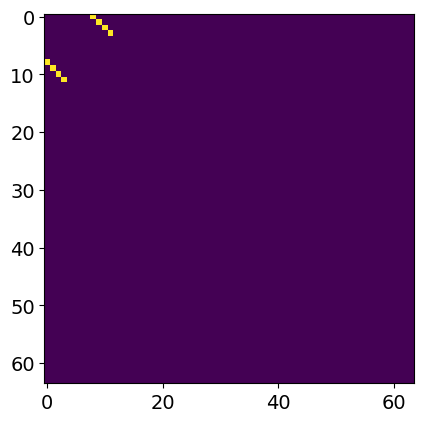

In [7]:
plt.imshow(full_dmat_J01.real)

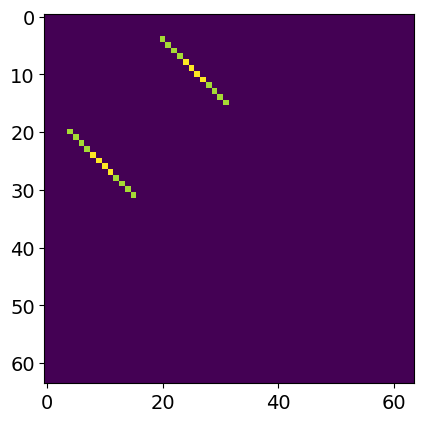

In [8]:
plt.imshow(full_dmat_J12.real)

In [9]:
Ez = smp.Symbol("Ez", real=True)
Ω0 = smp.Symbol("Ω0")
Ω1 = smp.Symbol("Ω1")
ω0 = smp.Symbol("ω0", real=True)
δ0 = smp.Symbol("δ0", real=True)
ω1 = smp.Symbol("ω1", real=True)
δ1 = smp.Symbol("δ1", real=True)

In [10]:
heff0 = Huncoupled
stark = HSz_unc.copy()
Heff = smp.Matrix(heff0 + stark * Ez)
func, _ = sympy_matrix_to_julia_fill_hermitian(Heff, "hamiltonian_full_nocoupling!")
print(func)

with open("J01_J12_spa_functions.jl", "w") as f:
    f.write(func)
    f.write("\n\n")

function hamiltonian_full_nocoupling!(H, Ez)
    @inbounds begin
        zero_matrix!(H)
        t0 = -7721437.06731616 * Ez
        t1 = -5980999.43410083 * Ez
        t2 = -6906263.26660222 * Ez
        t3 = -5054867.11925916 * Ez
        t4 = -6393957.34654118 * Ez
        t5 = -6781815.89753522 * Ez
        H[1,1] = -20891.3873116726
        H[1,9] = t0
        H[9,1] = conj(H[1,9])
        H[1,20] = -12045.0481400455
        H[20,1] = conj(H[1,20])
        H[1,22] = 6022.52407002275
        H[22,1] = conj(H[1,22])
        H[1,23] = 6022.52407002275
        H[23,1] = conj(H[1,23])
        H[1,25] = -4917.37031172851
        H[25,1] = conj(H[1,25])
        H[2,2] = 20891.5431975001
        H[2,3] = -41783.1822927442
        H[3,2] = conj(H[2,3])
        H[2,10] = t0
        H[10,2] = conj(H[2,10])
        H[2,24] = -6022.52407002275
        H[24,2] = conj(H[2,24])
        H[2,26] = 4917.37031172851
        H[26,2] = conj(H[2,26])
        H[2,27] = 4917.37031172851
        H[27,2] = 

In [11]:
cpl_J01 = full_dmat_J01.copy()
cpl_J01[cpl_J01 < 1e-5] = 0
cpl_J12 = full_dmat_J12.copy()
cpl_J12[cpl_J12 < 1e-5] = 0

Heff = smp.Matrix(Ω0 * cpl_J01 / 2) + smp.Matrix(Ω1 * cpl_J12 / 2)
func, _ = sympy_matrix_to_julia_fill_hermitian(
    Heff, "coupling_full!", zero_input=True, inplace_add=False, input_name="C"
)
print(func)

with open("J01_J12_spa_functions.jl", "a") as f:
    f.write(func)
    f.write("\n\n")

function coupling_full!(C, Ω0, Ω1)
    @inbounds begin
        zero_matrix!(C)
        t0 = 0.288675134594813 * Ω0
        t1 = 0.223606797749979 * Ω1
        t2 = 0.223606797749979 * Ω1
        t3 = 0.223606797749979 * Ω1
        t4 = 0.258198889747161 * Ω1
        t5 = 0.258198889747161 * Ω1
        C[1,9] = t0
        C[9,1] = conj(C[1,9])
        C[2,10] = t0
        C[10,2] = conj(C[2,10])
        C[3,11] = t0
        C[11,3] = conj(C[3,11])
        C[4,12] = t0
        C[12,4] = conj(C[4,12])
        C[5,21] = t1
        C[21,5] = conj(C[5,21])
        C[6,22] = t2
        C[22,6] = conj(C[6,22])
        C[7,23] = t1
        C[23,7] = conj(C[7,23])
        C[8,24] = t3
        C[24,8] = conj(C[8,24])
        C[9,25] = t4
        C[25,9] = conj(C[9,25])
        C[10,26] = t5
        C[26,10] = conj(C[10,26])
        C[11,27] = t5
        C[27,11] = conj(C[11,27])
        C[12,28] = t4
        C[28,12] = conj(C[12,28])
        C[13,29] = t3
        C[29,13] = conj(C[13,29])
       

In [103]:
rot_transform = smp.zeros(*Huncoupled.shape)
for i in range(4, 16):
    rot_transform[i, i] -= ω0 + δ0 - δ1
for i in range(16, 36):
    rot_transform[i, i] -= ω1 + ω0

func, _ = sympy_matrix_to_julia_fill_hermitian(
    rot_transform, "detuning!", zero_input=False, inplace_add=True, input_name="H"
)
print(func)

with open("J01_J12_spa_functions.jl", "a") as f:
    f.write(func)
    f.write("\n\n")

function detuning!(H, δ0, δ1, ω0, ω1)
    @inbounds begin
        t0 = -δ0 + δ1 - ω0
        t1 = -ω0 - ω1
        H[5,5] += t0
        H[6,6] += t0
        H[7,7] += t0
        H[8,8] += t0
        H[9,9] += t0
        H[10,10] += t0
        H[11,11] += t0
        H[12,12] += t0
        H[13,13] += t0
        H[14,14] += t0
        H[15,15] += t0
        H[16,16] += t0
        H[17,17] += t1
        H[18,18] += t1
        H[19,19] += t1
        H[20,20] += t1
        H[21,21] += t1
        H[22,22] += t1
        H[23,23] += t1
        H[24,24] += t1
        H[25,25] += t1
        H[26,26] += t1
        H[27,27] += t1
        H[28,28] += t1
        H[29,29] += t1
        H[30,30] += t1
        H[31,31] += t1
        H[32,32] += t1
        H[33,33] += t1
        H[34,34] += t1
        H[35,35] += t1
        H[36,36] += t1
    end
    nothing
end


In [49]:
zμ0 = 0.0
zμ1 = 25.4e-3 * 1.125

In [101]:
from state_prep.electric_fields import Ez_from_csv

Ez = Ez_from_csv()

E, V = np.linalg.eigh(ham_func([0, 0, Ez(-0.25)], [0, 0, 1e-5]))

QN = hamiltonian.matrix_to_states(V, list(X_states_uncoupled))
QN = [qn.remove_small_components().normalize() for qn in QN]

QN_coupled = [qn.transform_to_coupled() for qn in QN]
QN_coupled = [qn.remove_small_components().normalize() for qn in QN_coupled]

display(QN_coupled[3].largest)
display(QN_coupled[10].largest)

print(E[10] - E[3])
print((E[10] - E[3]) / (2 * np.pi * 1e6), "MHz")

display(QN_coupled[10].largest)
display(QN_coupled[28].largest)

print(E[28] - E[10])
print((E[28] - E[10]) / (2 * np.pi * 1e6), "MHz")

|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>

|X, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

83784430033.205
13334.70619392163 MHz


|X, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|X, J = 2, F₁ = 5/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>

167568624056.66653
26669.37482572597 MHz


In [92]:
E, V = np.linalg.eigh(ham_func([0, 0, Ez(zμ0)], [0, 0, 1e-5]))

QN = hamiltonian.matrix_to_states(V, list(X_states_uncoupled))
QN = [qn.remove_small_components().normalize() for qn in QN]

QN_coupled = [qn.transform_to_coupled() for qn in QN]
QN_coupled = [qn.remove_small_components().normalize() for qn in QN_coupled]

display(QN_coupled[3].largest)
display(QN_coupled[15].largest)

print(E[15] - E[3])
print((E[15] - E[3]) / (2 * np.pi * 1e6), "MHz")

|X, J = 0, F₁ = 1/2, F = 0, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>

|X, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

83817989701.69382
13340.04738105015 MHz


In [93]:
E, V = np.linalg.eigh(ham_func([0, 0, Ez(zμ1)], [0, 0, 1e-5]))

QN = hamiltonian.matrix_to_states(V, list(X_states_uncoupled))
QN = [qn.remove_small_components().normalize() for qn in QN]

QN_coupled = [qn.transform_to_coupled() for qn in QN]
QN_coupled = [qn.remove_small_components().normalize() for qn in QN_coupled]

display(QN_coupled[15].largest)
display(QN_coupled[32].largest)

print(E[32] - E[15])
print((E[32] - E[15]) / (2 * np.pi * 1e6), "MHz")

|X, J = 1, F₁ = 3/2, F = 1, mF = 0, I₁ = 1/2, I₂ = 1/2, P = -, Ω = 0>

|X, J = 2, F₁ = 5/2, F = 2, mF = 0, I₁ = 1/2, I₂ = 1/2, P = +, Ω = 0>

167564827658.9896
26668.77061026974 MHz
